In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
from sklearn import preprocessing
import scipy

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix
from sklearn import tree

from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

import copy
from sklearn.model_selection import KFold
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

from sklearn.preprocessing import MinMaxScaler

import os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

sc = MinMaxScaler(feature_range = (0, 1))

%matplotlib inline

In [125]:
address1 = '0.csv'
address2 = '1.csv'
address3 = '2.csv'
address4 = '3.csv'
names = ['s1r1','s2r1','s3r1','s4r1','s5r1','s6r1','s7r1','s8r1',
               's1r2','s2r2','s3r2','s4r2','s5r2','s6r2','s7r2','s8r2',
               's1r3','s2r3','s3r3','s4r3','s5r3','s6r3','s7r3','s8r3',
               's1r4','s2r4','s3r4','s4r4','s5r4','s6r4','s7r4','s8r4',
               's1r5','s2r5','s3r5','s4r5','s5r5','s6r5','s7r5','s8r5',
               's1r6','s2r6','s3r6','s4r6','s5r6','s6r6','s7r6','s8r6',
               's1r7','s2r7','s3r7','s4r7','s5r7','s6r7','s7r7','s8r7',
               's1r8','s2r8','s3r8','s4r8','s5r8','s6r8','s7r8','s8r8','outcome']
df1 = pd.read_csv(address1,names=names)
df2 = pd.read_csv(address2,names=names)
df3 = pd.read_csv(address3,names=names)
df4 = pd.read_csv(address4,names=names)
frames = [df1,df2,df3,df4]
data = pd.concat(frames)

In [126]:
data.describe()

,s1r1,s2r1,s3r1,s4r1,s5r1,s6r1,s7r1,s8r1,s1r2,s2r2,...,s8r7,s1r8,s2r8,s3r8,s4r8,s5r8,s6r8,s7r8,s8r8,outcome
count,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,...,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000
mean,-0.520380,-0.726837,-0.739082,-0.729748,-0.159103,-0.554890,-1.272649,-0.661843,-0.665953,-0.654222,...,-0.932694,-0.836958,-0.740623,-0.768710,-0.705343,-0.146686,-0.374807,-1.449306,-0.609094,1.503254
std,18.566709,11.766878,4.989944,7.441675,17.850402,25.809528,25.089972,15.408896,18.123854,11.841260,...,15.158993,18.204465,12.005206,4.969758,7.384410,17.841479,25.551082,25.259736,15.530091,1.117541
min,-116.000000,-104.000000,-33.000000,-75.000000,-121.000000,-122.000000,-128.000000,-128.000000,-110.000000,-128.000000,...,-128.000000,-116.000000,-128.000000,-46.000000,-74.000000,-103.000000,-128.000000,-128.000000,-124.000000,0.000000
25%,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,...,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-6.000000,-8.000000,1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,2.000000
75%,7.000000,3.000000,2.000000,3.000000,10.000000,13.000000,4.000000,6.000000,6.000000,3.000000,...,6.000000,6.000000,3.000000,2.000000,3.000000,10.000000,13.000000,3.000000,6.000000,3.000000
max,111.000000,90.000000,34.000000,55.000000,92.000000,127.000000,127.000000,126.000000,127.000000,106.000000,...,114.000000,127.000000,105.000000,29.000000,51.000000,110.000000,127.000000,127.000000,127.000000,3.000000


In [127]:
corr = data.corr()
corr

,s1r1,s2r1,s3r1,s4r1,s5r1,s6r1,s7r1,s8r1,s1r2,s2r2,...,s8r7,s1r8,s2r8,s3r8,s4r8,s5r8,s6r8,s7r8,s8r8,outcome
s1r1,1.000000,0.236175,0.055443,0.007532,-0.022459,0.012504,0.131200,0.230922,-0.357610,-0.072079,...,0.026089,0.004530,0.007598,0.000008,-0.009172,-0.016544,-0.010714,-0.019816,-0.005071,-0.005067
s2r1,0.236175,1.000000,0.335145,0.087050,-0.065602,-0.018666,0.066148,0.085071,-0.054460,-0.276969,...,0.007169,-0.010128,-0.004745,0.007680,-0.006762,-0.010608,-0.006335,-0.017750,-0.004669,-0.002406
s3r1,0.055443,0.335145,1.000000,0.510603,-0.049996,0.025723,0.094532,0.111974,-0.029452,-0.129410,...,-0.003032,0.010135,-0.025798,-0.013198,-0.014346,0.018602,0.006114,-0.007898,-0.007970,-0.001895
s4r1,0.007532,0.087050,0.510603,1.000000,0.050598,0.062652,0.034946,0.040564,-0.015133,-0.053802,...,-0.013151,0.004011,0.002588,-0.019178,-0.017830,0.017195,-0.001214,0.000571,-0.003883,-0.006233
s5r1,-0.022459,-0.065602,-0.049996,0.050598,1.000000,0.509146,0.090774,0.033018,-0.003021,0.004497,...,0.012888,-0.022000,0.003458,-0.004212,-0.001602,0.002776,-0.011707,-0.009237,-0.018266,-0.003997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s5r8,-0.016544,-0.010608,0.018602,0.017195,0.002776,-0.015946,-0.008885,-0.004736,0.004999,-0.009214,...,0.011465,-0.005862,-0.059276,-0.055527,0.047117,1.000000,0.510996,0.109822,0.033822,0.001852
s6r8,-0.010714,-0.006335,0.006114,-0.001214,-0.011707,-0.019112,0.005507,-0.000081,0.006306,0.002171,...,0.008811,0.030463,-0.012113,0.009803,0.032700,0.510996,1.000000,0.242202,0.136009,-0.000523
s7r8,-0.019816,-0.017750,-0.007898,0.000571,-0.009237,-0.033776,-0.021347,-0.015342,0.015947,-0.008663,...,-0.160650,0.112836,0.066652,0.084170,0.037117,0.109822,0.242202,1.000000,0.463950,0.038721
s8r8,-0.005071,-0.004669,-0.007970,-0.003883,-0.018266,-0.031778,-0.021536,-0.033932,0.012057,-0.005195,...,-0.296766,0.226695,0.098331,0.112107,0.062475,0.033822,0.136009,0.463950,1.000000,0.016770


In [10]:
x,y = np.where(abs(corr)>0.5)

for i in range(len(x)):
    if(x[i]<y[i]):
        print('('+repr(x[i])+','+repr(y[i])+')')

(2,3)
(4,5)
(10,11)
(18,19)
(20,21)
(28,29)
(34,35)
(42,43)
(44,45)
(52,53)
(58,59)
(60,61)


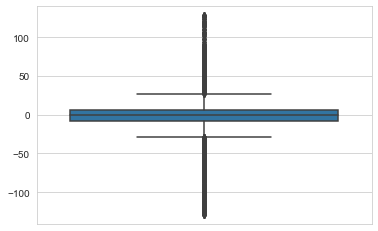

In [11]:
sb.set_style('whitegrid')
sb.boxplot(y=data[:64], showfliers = True)

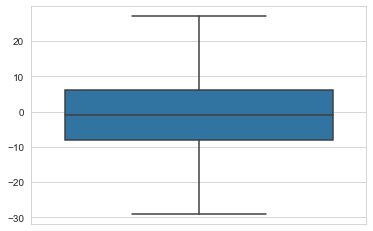

In [12]:
sb.boxplot(y=data[:64], showfliers = False)

(array([9.000e+00, 2.900e+01, 1.500e+02, 1.066e+03, 7.276e+03, 2.572e+03,
        4.280e+02, 1.190e+02, 2.200e+01, 7.000e+00]),
 array([-116. ,  -91.7,  -67.4,  -43.1,  -18.8,    5.5,   29.8,   54.1,
          78.4,  102.7,  127. ]),
 <a list of 10 Patch objects>)

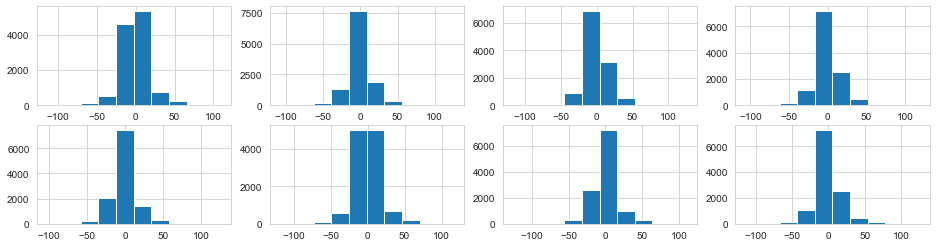

In [13]:
plt.figure(figsize=(16,4));
plt.subplot(241)
plt.hist(data['s1r1'])
plt.subplot(242)
plt.hist(data['s1r2'])
plt.subplot(243)
plt.hist(data['s1r3'])
plt.subplot(244)
plt.hist(data['s1r4'])
plt.subplot(245)
plt.hist(data['s1r5'])
plt.subplot(246)
plt.hist(data['s1r6'])
plt.subplot(247)
plt.hist(data['s1r7'])
plt.subplot(248)
plt.hist(data['s1r8'])

(array([6.000e+00, 1.400e+01, 5.300e+01, 3.420e+02, 5.187e+03, 5.532e+03,
        4.460e+02, 7.700e+01, 1.700e+01, 4.000e+00]),
 array([-128. , -102.6,  -77.2,  -51.8,  -26.4,   -1. ,   24.4,   49.8,
          75.2,  100.6,  126. ]),
 <a list of 10 Patch objects>)

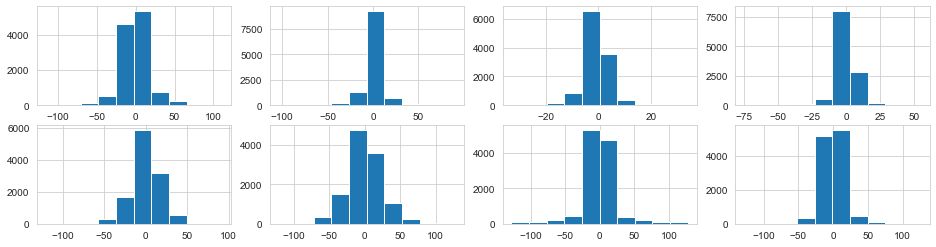

In [14]:
plt.figure(figsize=(16,4));
plt.subplot(241)
plt.hist(data['s1r1'])
plt.subplot(242)
plt.hist(data['s2r1'])
plt.subplot(243)
plt.hist(data['s3r1'])
plt.subplot(244)
plt.hist(data['s4r1'])
plt.subplot(245)
plt.hist(data['s5r1'])
plt.subplot(246)
plt.hist(data['s6r1'])
plt.subplot(247)
plt.hist(data['s7r1'])
plt.subplot(248)
plt.hist(data['s8r1'])

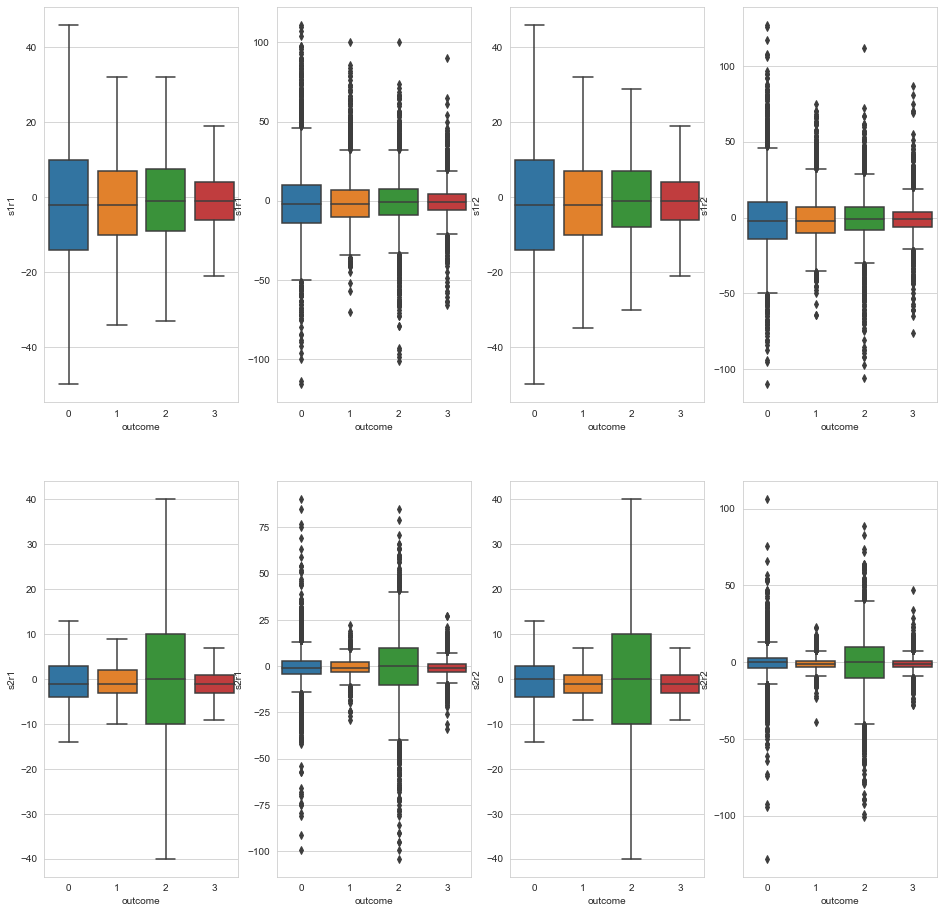

In [15]:
sb.set_style('whitegrid')
plt.figure(figsize=(16,16));
plt.subplot(241)
sb.boxplot(x='outcome',y = 's1r1',data=data, showfliers = False)
plt.subplot(242)
sb.boxplot(x='outcome',y = 's1r1',data=data, showfliers = True)
plt.subplot(243)
sb.boxplot(x='outcome',y = 's1r2',data=data, showfliers = False)
plt.subplot(244)
sb.boxplot(x='outcome',y = 's1r2',data=data, showfliers = True)
plt.subplot(245)
sb.boxplot(x='outcome',y = 's2r1',data=data, showfliers = False)
plt.subplot(246)
sb.boxplot(x='outcome',y = 's2r1',data=data, showfliers = True)
plt.subplot(247)
sb.boxplot(x='outcome',y = 's2r2',data=data, showfliers = False)
plt.subplot(248)
sb.boxplot(x='outcome',y = 's2r2',data=data, showfliers = True)

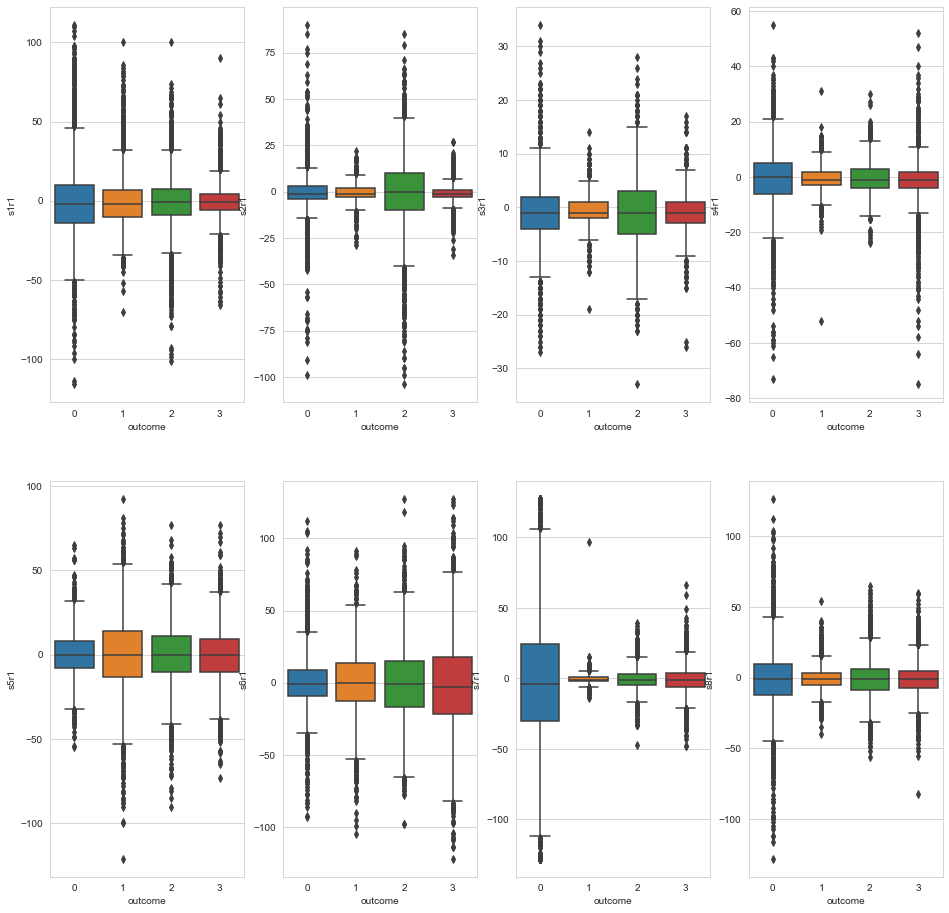

In [16]:
sb.set_style('whitegrid')
plt.figure(figsize=(16,16));
plt.subplot(241)
sb.boxplot(x='outcome',y = 's1r1',data=data)
plt.subplot(242)
sb.boxplot(x='outcome',y = 's2r1',data=data)
plt.subplot(243)
sb.boxplot(x='outcome',y = 's3r1',data=data)
plt.subplot(244)
sb.boxplot(x='outcome',y = 's4r1',data=data)
plt.subplot(245)
sb.boxplot(x='outcome',y = 's5r1',data=data)
plt.subplot(246)
sb.boxplot(x='outcome',y = 's6r1',data=data)
plt.subplot(247)
sb.boxplot(x='outcome',y = 's7r1',data=data)
plt.subplot(248)
sb.boxplot(x='outcome',y = 's8r1',data=data)

Text(0.5, 1.0, 'Sensor 7 Reading 1')

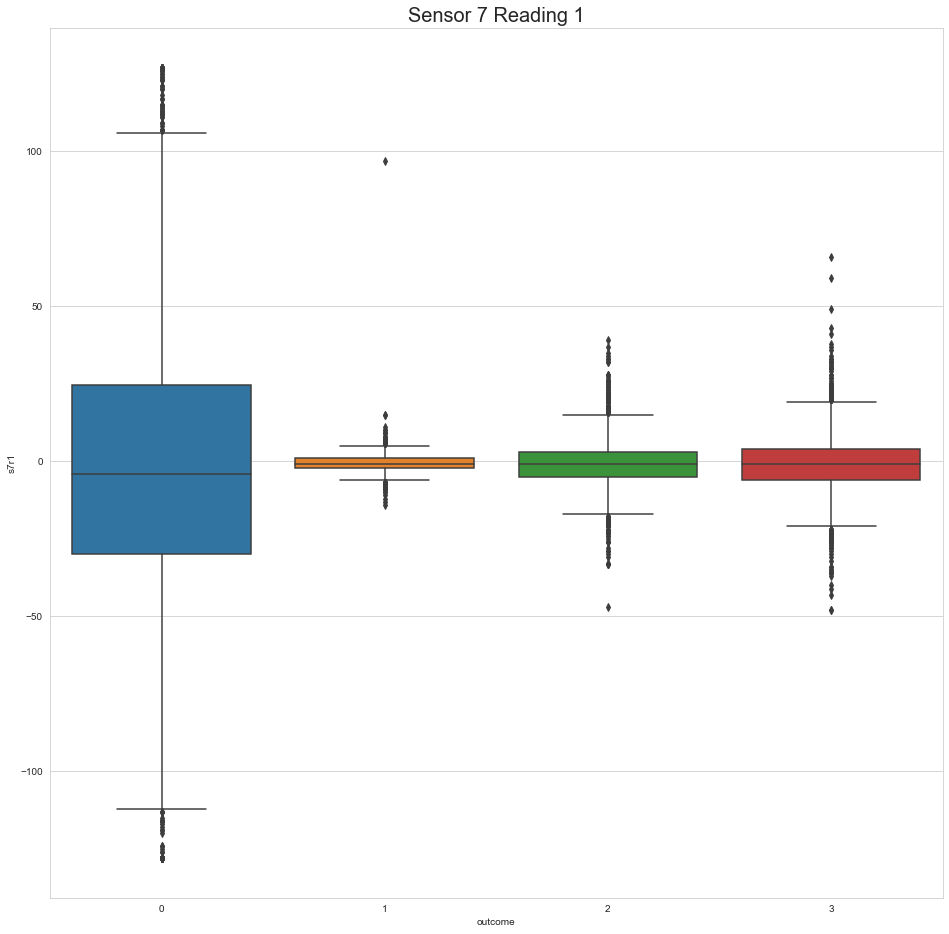

In [17]:
sb.set_style('whitegrid')
plt.figure(figsize=(16,16));
sb.boxplot(x='outcome',y = 's7r1',data=data, showfliers = True)
plt.title("Sensor 7 Reading 1",fontsize=20)

Text(0.5, 1.0, 'Sensor 7 Reading 8')

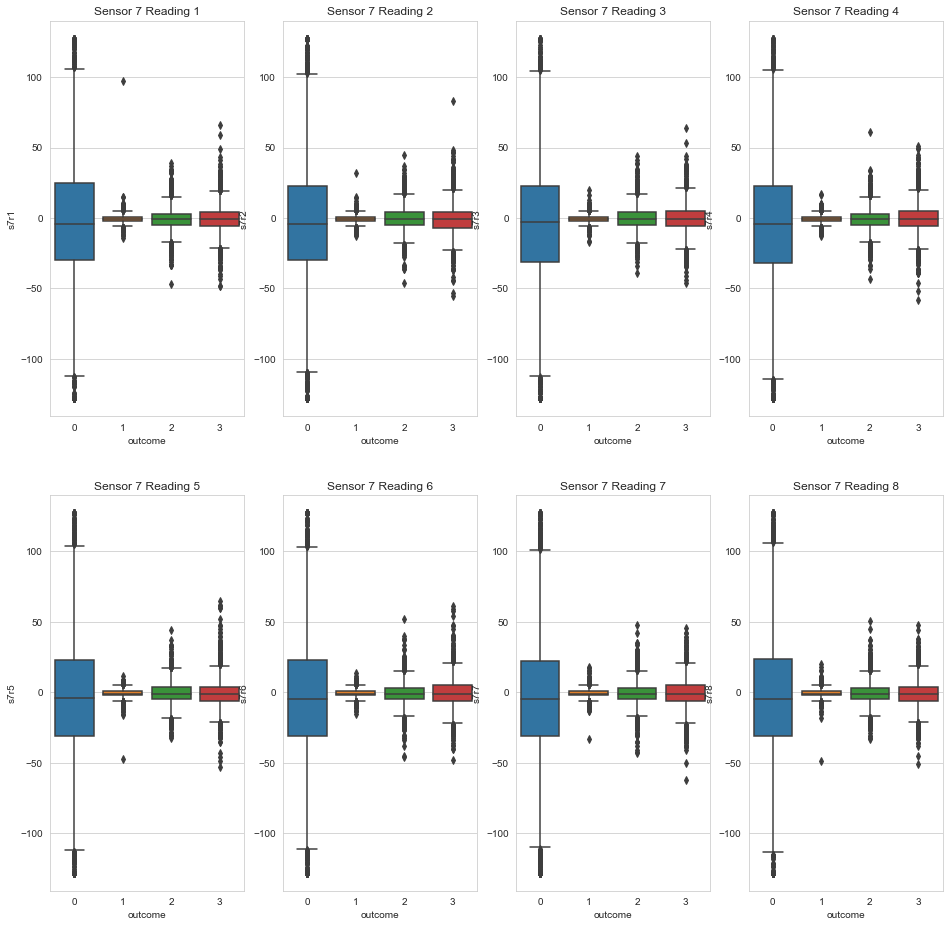

In [18]:
sb.set_style('whitegrid')
plt.figure(figsize=(16,16));

plt.subplot(241)
sb.boxplot(x='outcome',y = 's7r1',data=data, showfliers = True)
plt.title("Sensor 7 Reading 1")
plt.subplot(242)
sb.boxplot(x='outcome',y = 's7r2',data=data, showfliers = True)
plt.title("Sensor 7 Reading 2")
plt.subplot(243)
sb.boxplot(x='outcome',y = 's7r3',data=data, showfliers = True)
plt.title("Sensor 7 Reading 3")
plt.subplot(244)
sb.boxplot(x='outcome',y = 's7r4',data=data, showfliers = True)
plt.title("Sensor 7 Reading 4")
plt.subplot(245)
sb.boxplot(x='outcome',y = 's7r5',data=data, showfliers = True)
plt.title("Sensor 7 Reading 5")
plt.subplot(246)
sb.boxplot(x='outcome',y = 's7r6',data=data, showfliers = True)
plt.title("Sensor 7 Reading 6")
plt.subplot(247)
sb.boxplot(x='outcome',y = 's7r7',data=data, showfliers = True)
plt.title("Sensor 7 Reading 7")
plt.subplot(248)
sb.boxplot(x='outcome',y = 's7r8',data=data, showfliers = True)
plt.title("Sensor 7 Reading 8")

In [82]:
dataX = data.iloc[:,0:64].values
dataY = data.iloc[:,64].values
X_train, X_test, y_train, y_test = train_test_split(dataX,dataY,test_size=0.7,random_state=100)

In [83]:
sc = StandardScaler()
dataX_scaled = sc.fit_transform(dataX)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
dfX_scaled = pd.DataFrame(dataX_scaled,columns=names[:64])

In [84]:
lda = LDA(n_components=3)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [85]:
pca = PCA(.95)
#pca = PCA(.95)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.04474706, 0.04379152, 0.04078266, 0.03955805, 0.03750308,
       0.03471578, 0.03364002, 0.03308318, 0.03122149, 0.03016305,
       0.02850274, 0.02673818, 0.02644164, 0.02589811, 0.02529324,
       0.02504342, 0.02350778, 0.0212288 , 0.02039707, 0.0198057 ,
       0.0194294 , 0.01867882, 0.01769234, 0.01632946, 0.01565823,
       0.01549143, 0.01448277, 0.01397676, 0.01300504, 0.01254205,
       0.01223892, 0.01169215, 0.01144285, 0.01108834, 0.01105617,
       0.01046302, 0.01016096, 0.00983337, 0.00961815, 0.00950654,
       0.00909022, 0.0081351 , 0.00756277, 0.00743812, 0.00707998,
       0.00683969, 0.00662507, 0.00643908, 0.00625898, 0.00610485,
       0.00594949])

In [33]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train,y_train)
y_pred_RF = classifier.predict(X_test)

In [35]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)
print('Accuracy ' + str(accuracy_score(y_test,y_pred_RF)))

[[562   0   3   6]
 [  0 505  19  33]
 [  9   7 559  17]
 [ 43  21  31 521]]
Accuracy 0.9190924657534246


In [36]:
nbrs = KNeighborsClassifier(n_neighbors=4)
nbrs.fit(X_train,y_train)
y_pred_KN = nbrs.predict(X_test)

In [51]:
cm_KN = confusion_matrix(y_test, y_pred_KN)
print(cm_scaled_KN)
print('Accuracy ' + str(accuracy_score(y_test,y_pred_KN)))

[[395  99  40  37]
 [  2 533   1  21]
 [  9 215 193 175]
 [ 36 170   6 404]]
Accuracy 0.663527397260274


In [52]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train_scaled,y_train)
y_pred_scaled_RF = classifier.predict(X_test_scaled)

In [39]:
cm_scaled_RF = confusion_matrix(y_test, y_pred_scaled_RF)
print(cm_scaled_RF)
print('Accuracy ' + str(accuracy_score(y_test,y_pred_scaled_RF)))

[[562   0   3   6]
 [  0 503  21  33]
 [  9   6 560  17]
 [ 42  20  31 523]]
Accuracy 0.9195205479452054


In [40]:
nbrs = KNeighborsClassifier(n_neighbors=4)
nbrs.fit(X_train_scaled,y_train)
y_pred_scaled_KN = nbrs.predict(X_test_scaled)

In [41]:
cm_scaled_KN = confusion_matrix(y_test, y_pred_scaled_KN)
print(cm_scaled_KN)
print('Accuracy ' + str(accuracy_score(y_test,y_pred_scaled_KN)))

[[395  99  40  37]
 [  2 533   1  21]
 [  9 215 193 175]
 [ 36 170   6 404]]
Accuracy 0.6528253424657534


In [42]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train_lda,y_train)
y_pred_lda_RF = classifier.predict(X_test_lda)

In [43]:
cm_lda_RF = confusion_matrix(y_test, y_pred_lda_RF)
print(cm_lda_RF)
print('Accuracy ' + str(accuracy_score(y_test,y_pred_lda_RF)))

[[292 100  90  89]
 [ 42 271 108 136]
 [ 75 171 185 161]
 [ 74 182 153 207]]
Accuracy 0.4088184931506849


In [44]:
nbrs = KNeighborsClassifier(n_neighbors=4)
nbrs.fit(X_train_lda,y_train)
y_pred_lda_KN = nbrs.predict(X_test_lda)

In [45]:
cm_lda_KN = confusion_matrix(y_test, y_pred_lda_KN)
print(cm_lda_KN)
print('Accuracy ' + str(accuracy_score(y_test,y_pred_lda_KN)))

[[309  84  95  83]
 [ 87 236 121 113]
 [131 175 165 121]
 [130 167 158 161]]
Accuracy 0.3728595890410959


In [46]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train_pca,y_train)
y_pred_pca_RF = classifier.predict(X_test_pca)

In [47]:
cm_pca_RF = confusion_matrix(y_test, y_pred_pca_RF)
print(cm_pca_RF)
print('Accuracy ' + str(accuracy_score(y_test,y_pred_pca_RF)))

[[452  25  69  25]
 [ 11 495  16  35]
 [ 40  23 482  47]
 [ 87  95  34 400]]
Accuracy 0.7829623287671232


In [48]:
nbrs = KNeighborsClassifier(n_neighbors=4)
nbrs.fit(X_train_pca,y_train)
y_pred_pca_KN = nbrs.predict(X_test_pca)

In [49]:
cm_pca_KN = confusion_matrix(y_test, y_pred_pca_KN)
print(cm_pca_KN)
print('Accuracy ' + str(accuracy_score(y_test,y_pred_pca_KN)))

[[382 103  35  51]
 [  2 539   1  15]
 [ 11 210 202 169]
 [ 32 185   7 392]]
Accuracy 0.6485445205479452


In [87]:
def plot_confusion(title, model, X_train, y_train, X_test, y_test):
    svm_confusion_matrix = plot_confusion_matrix(model, X_train, y_train,
                      display_labels=['Rock','Scissors', 'Paper', 'Ok'],
                      cmap=plt.cm.YlOrBr)
    svm_confusion_matrix.ax_.set_title(title + " Confusion Matrix (Training Set)")
    plt.show()

    svm_confusion_matrix = plot_confusion_matrix(model, X_test, y_test,
                          display_labels=['Rock','Scissors', 'Paper', 'Ok'],
                          cmap=plt.cm.YlOrBr)
    svm_confusion_matrix.ax_.set_title(title + " Confusion Matrix (Testing Set)")
    plt.show()

In [142]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Predictive Accuracy")
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,verbose=2)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")
    print("CV Scores:",test_scores_mean)

    return plt

Decision Tree Train Accuracy 0.803882386525835
Decision Tree Test Accuracy 0.7302752293577982
[learning_curve] Training set sizes: [ 315 1024 1733 2442 3152]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:   14.5s remaining:   14.5s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   15.1s finished


CV Scores: [0.60432641 0.67058934 0.71596174 0.73166707 0.73678632]


<module 'matplotlib.pyplot' from '/Users/ahsanaziz/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

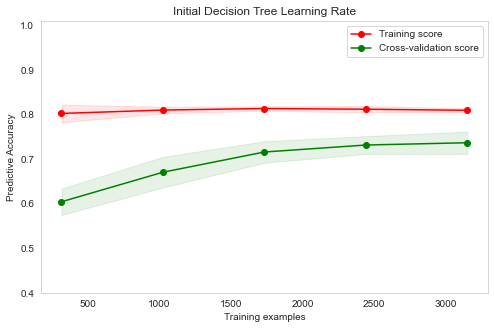

In [101]:
#Estimate parameters
decision_tree = tree.DecisionTreeClassifier(max_depth=10, 
                                  criterion='entropy',
                                  min_samples_leaf=10,
                                  min_samples_split=5,
                                  random_state=0)
decision_tree.fit(X_train, y_train)

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

print('Decision Tree Train Accuracy' , accuracy_score(y_train, y_train_pred))
print('Decision Tree Test Accuracy' , accuracy_score(y_test, y_test_pred))

cv = KFold(n_splits=10, random_state=0, shuffle=True)

fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(decision_tree, "Initial Decision Tree Learning Rate", 
                    X_train, y_train, axes=[axes], ylim=(0.4, 1.01),
                    cv=cv, n_jobs=4)

In [103]:
dt_params = {
    "criterion":['gini','entropy'],
    "max_depth":range(5,30),
    "min_samples_leaf":range(1,5),
    "min_samples_split":range(1,5)
}
decision_tree = tree.DecisionTreeClassifier()


grid = GridSearchCV(decision_tree,
                    param_grid = dt_params,
                    cv=10,
                    verbose=1,
                    n_jobs=-1
)
grid.fit(X_train,y_train)
print(grid.best_params_)
#Best params:
#{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3}

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 1644 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 2504 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3276 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 4280 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 5580 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 7080 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  5.9min finished


{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [105]:
def r2(a,b):
    this_correlation = np.corrcoef(a, b)[0,1]
    this_r2 = this_correlation**2
    return this_r2

In [148]:
start_time = time.time();
decision_tree = tree.DecisionTreeClassifier(max_depth=20,
                                  criterion='gini',
                                  random_state=0,
                                  min_samples_leaf=1,
                                  min_samples_split=3)
decision_tree.fit(X_train, y_train)
print("Training time:",time.time()-start_time)

start_time = time.time();
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

print('Decision Tree Train Accuracy' , accuracy_score(y_train, y_train_pred))
print("Decision Tree Train r2 score:",r2(y_train, y_train_pred))
print('Decision Tree Test Accuracy' , accuracy_score(y_test, y_test_pred))
print("Decision Tree Test r2 score:",r2(y_test, y_test_pred))
print("F1 SCORE:",round(f1_score(y_test, y_test_pred, average='micro'),3))

Training time: 0.18572473526000977
Decision Tree Train Accuracy 0.972023979446189
Decision Tree Train r2 score: 0.9188562363749792
Decision Tree Test Accuracy 0.7577981651376147
Decision Tree Test r2 score: 0.41604128436936905
F1 SCORE: 0.758


[learning_curve] Training set sizes: [ 315 1024 1733 2442 3152]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:    4.2s remaining:    4.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    5.1s finished


CV Scores: [0.60803826 0.70254945 0.73993081 0.73794872 0.76591372]


<module 'matplotlib.pyplot' from '/Users/ahsanaziz/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

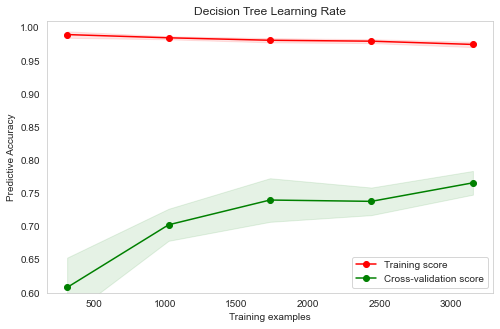

In [107]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

estimator = tree.DecisionTreeClassifier(max_depth=20,
                                  criterion='gini',
                                  random_state=0,
                                  min_samples_leaf=1,
                                  min_samples_split=3)
fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(estimator, "Decision Tree Learning Rate", X_train, y_train, axes=[axes], ylim=(0.6, 1.01),
                    cv=cv, n_jobs=4)

Using Poly Kernel:
SVM Train Accuracy 0.7210962032543534
SVM Test Accuracy 0.43522935779816513
[learning_curve] Training set sizes: [ 315 1024 1733 2442 3152]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  50 | elapsed:   14.0s remaining:   14.0s


CV Scores: [0.29802279 0.33629141 0.38254864 0.40766952 0.44220676]


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   27.1s finished


<module 'matplotlib.pyplot' from '/Users/ahsanaziz/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

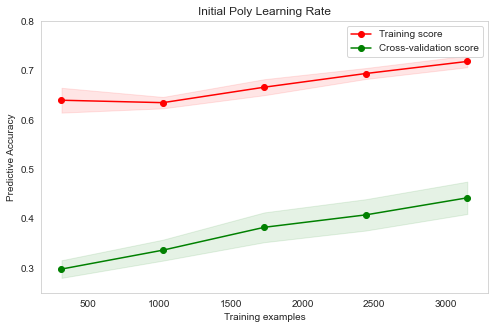

In [110]:
#Initial model
svm = SVC(kernel='poly',
          C=1,
          degree=3,
          random_state=0)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("Using Poly Kernel:")
print('SVM Train Accuracy' , accuracy_score(y_train, y_train_pred))
print('SVM Test Accuracy' , accuracy_score(y_test, y_test_pred))

cv = KFold(n_splits=10, random_state=0, shuffle=True)
fig, axes = plt.subplots(1,1, figsize=(8, 5))
plot_learning_curve(svm, "Initial Poly Learning Rate", X_train, y_train, axes=[axes], ylim=(0.25, 0.8),
                    cv=cv, n_jobs=4)

In [111]:
svm_params1 = {
    "kernel":['poly'],
    "degree":range(1,5),
    "C":[0.01,0.1,1,10]
}

svm = SVC()
grid = GridSearchCV(svm,
                    param_grid = svm_params1,
                    cv=10,
                    verbose=1,
                    n_jobs=-1
)
grid.fit(X_train,y_train)
print(grid.best_params_)
#{'C': 10, 'degree': 2, 'kernel': 'poly'}

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.9min finished


{'C': 10, 'degree': 2, 'kernel': 'poly'}


In [150]:
svm = SVC(kernel='poly',
          C=10,
          degree=2,
          random_state=0)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("Using Poly Kernel:")
print('SVM Train Accuracy' , accuracy_score(y_train, y_train_pred))
print("SVM Train r2 score:",r2(y_train, y_train_pred))
print('SVM Test Accuracy' , accuracy_score(y_test, y_test_pred))
print("SVM Test r2 score:",r2(y_test, y_test_pred))
print("F1 SCORE:",round(f1_score(y_test, y_test_pred, average='micro'),3))

Using Poly Kernel:
SVM Train Accuracy 0.9754496146160434
SVM Train r2 score: 0.9601950957462886
SVM Test Accuracy 0.8775535168195718
SVM Test r2 score: 0.804462738588501
F1 SCORE: 0.878


In [112]:
svm_params1 = {
    "kernel":['rbf'],
    "gamma":['scale','auto']
}

svm = SVC()
grid = GridSearchCV(svm,
                    param_grid = svm_params1,
                    cv=10,
                    verbose=1,
                    n_jobs=-1
)
grid.fit(X_train,y_train)
print(grid.best_params_)
#{'gamma': 'scale', 'kernel': 'rbf'}

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.4s finished


{'gamma': 'scale', 'kernel': 'rbf'}


In [149]:
svm = SVC(kernel='rbf',
          gamma='scale',
          random_state=0)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

print("\nUsing RBF Kernel:")
print('SVM Train Accuracy' , accuracy_score(y_train, y_train_pred))
print("SVM Train r2 score:",r2(y_train, y_train_pred))
print('SVM Test Accuracy' , accuracy_score(y_test, y_test_pred))
print("SVM Test r2 score:",r2(y_test, y_test_pred))
print("F1 SCORE:",round(f1_score(y_test, y_test_pred, average='micro'),3))


Using RBF Kernel:
SVM Train Accuracy 0.905224093634028
SVM Train r2 score: 0.8323149308417609
SVM Test Accuracy 0.8204281345565749
SVM Test r2 score: 0.7183469969451003
F1 SCORE: 0.82


In [115]:
lr_grid = {'max_depth' : [2,4,8,16,32,64,128],
           'criterion' : ['entropy','gini']}
clf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
gs = GridSearchCV(estimator = clf, param_grid=lr_grid,cv = 10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 16, 32, 64, 128]})

In [119]:
y_pred = gs.predict(X_test)
gs.best_params_

{'criterion': 'entropy', 'max_depth': 64}

In [120]:
print('Classification Report: \n', classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2031
           1       0.93      0.91      0.92      2007
           2       0.92      0.93      0.92      2083
           3       0.87      0.84      0.86      2054

    accuracy                           0.91      8175
   macro avg       0.91      0.91      0.91      8175
weighted avg       0.91      0.91      0.91      8175



In [121]:
print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[1967    0   22   42]
 [   1 1823   63  120]
 [  27   43 1927   86]
 [ 141   94   88 1731]]


In [77]:
rock_dataset = pd.read_csv("0.csv", header=None) # class = 0
scissors_dataset = pd.read_csv("1.csv", header=None) # class = 1
paper_dataset = pd.read_csv("2.csv", header=None) # class = 2
ok_dataset = pd.read_csv("3.csv", header=None) # class = 3

frames = [rock_dataset, scissors_dataset, paper_dataset, ok_dataset]
dataset = pd.concat(frames)

dataset_train = dataset.iloc[np.random.permutation(len(dataset))]
dataset_train.reset_index(drop=True)

X_train = []
y_train = []

for i in range(0, dataset_train.shape[0]):
    row = np.array(dataset_train.iloc[i:1+i, 0:64].values)
    X_train.append(np.reshape(row, (64, 1)))
    y_train.append(np.array(dataset_train.iloc[i:1+i, -1:])[0][0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = X_train.reshape(X_train.shape[0]*X_train.shape[1], 1)
X_train = sc.fit_transform(X_train)

X_train = X_train.reshape((-1, 8, 8))

# Convert to one hot
y_train = np.eye(np.max(y_train) + 1)[y_train]

print("All Data size X and y")
print(X_train.shape)
print(y_train.shape)

# Splitting Train/Test
X_test = X_train[7700:]
y_test = y_train[7700:]
print("Test Data size X and y")
print(X_test.shape)
print(y_test.shape)

X_train = X_train[0:7700]
y_train = y_train[0:7700]
print("Train Data size X and y")
print(X_train.shape)
print(y_train.shape)

classifier = Sequential()

classifier.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 8)))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 50, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 50, return_sequences = True))
classifier.add(Dropout(0.2))

classifier.add(LSTM(units = 50))
classifier.add(Dropout(0.2))

classifier.add(Dense(units = 64))
classifier.add(Dense(units = 128))

classifier.add(Dense(units = 4, activation="softmax"))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy')

classifier.fit(X_train, y_train, epochs = 250, batch_size = 32, verbose=2)

# Save
classifier.save("model_cross_splited_data.h5")
print("Saved model to disk")

from tensorflow import keras

# # Load Model
# model = keras.models.load_model('model_cross_splited_data.h5')
# model.summary()

def evaluateModel(prediction, y):
    good = 0
    for i in range(len(y)):
        if (prediction[i] == np.argmax(y[i])):
            good = good +1
    return (good/len(y)) * 100.0

result_test = classifier.predict_classes(X_test)
print("Correct classification rate on test data")
print(evaluateModel(result_test, y_test))

result_train = classifier.predict_classes(X_train)
print("Correct classification rate on train data")
print(evaluateModel(result_train, y_train))

All Data size X and y
(11678, 8, 8)
(11678, 4)
Test Data size X and y
(3978, 8, 8)
(3978, 4)
Train Data size X and y
(7700, 8, 8)
(7700, 4)
Epoch 1/250
241/241 - 11s - loss: 0.5682
Epoch 2/250
241/241 - 4s - loss: 0.5633
Epoch 3/250
241/241 - 4s - loss: 0.5632
Epoch 4/250
241/241 - 4s - loss: 0.5628
Epoch 5/250
241/241 - 5s - loss: 0.5627
Epoch 6/250
241/241 - 4s - loss: 0.5629
Epoch 7/250
241/241 - 4s - loss: 0.5626
Epoch 8/250
241/241 - 4s - loss: 0.5620
Epoch 9/250
241/241 - 4s - loss: 0.5602
Epoch 10/250
241/241 - 4s - loss: 0.5365
Epoch 11/250
241/241 - 4s - loss: 0.4895
Epoch 12/250
241/241 - 7s - loss: 0.4779
Epoch 13/250
241/241 - 5s - loss: 0.4329
Epoch 14/250
241/241 - 5s - loss: 0.4199
Epoch 15/250
241/241 - 6s - loss: 0.4105
Epoch 16/250
241/241 - 5s - loss: 0.3996
Epoch 17/250
241/241 - 4s - loss: 0.3866
Epoch 18/250
241/241 - 5s - loss: 0.3690
Epoch 19/250
241/241 - 4s - loss: 0.3542
Epoch 20/250
241/241 - 4s - loss: 0.3224
Epoch 21/250
241/241 - 4s - loss: 0.3074
Epoch 2

/Users/ahsanaziz/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Correct classification rate on test data
95.55052790346909
Correct classification rate on train data
99.97402597402598
